# <center><b><h1>NeuralNetwork (First Run)</h1></b></center>

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, r2_score, recall_score, auc, roc_auc_score, roc_curve
import pandas as pd
from sklearn.externals import joblib
from scipy.stats import spearmanr, pearsonr
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_score
import itertools

from sklearn.neural_network import MLPClassifier

## 1. Prepare the data

In [2]:
df_X_train = pd.read_csv("../../../Data/women_menopause/X_train.csv", index_col=0)
df_X_train.shape

(156, 14)

In [3]:
df_y_train = pd.read_csv("../../../Data/women_menopause/y_train.csv", index_col=0)
df_y_train.shape

(156, 1)

In [4]:
df_X_val = pd.read_csv("../../../Data/women_menopause/X_val.csv", index_col=0)
df_X_val.shape

(10043, 14)

In [5]:
df_y_val = pd.read_csv("../../../Data/women_menopause/y_val.csv", index_col=0)
df_y_val.shape

(10043, 1)

## 2. Finding the best number of layers (between 1 and 2) and the best number of neurons

### 2.1 AUC based

# 0.5 because auc below 0.5 is not good, i have to quote the paper

In [6]:
best_score_sl = actual_score = 0.5
best_i_sl = 0
for i in range(1,32,1):
    mlp = MLPClassifier(hidden_layer_sizes=(i,), max_iter=200000,verbose=False)
    mlp.fit(df_X_train,df_y_train['Class'].values)
    predictions = mlp.predict(df_X_val.values)
    fpr, tpr, thresholds = roc_curve(df_y_val['Class'].values, predictions, pos_label=1)
    actual_score = auc(fpr, tpr)
    if actual_score > best_score_sl:
        best_score_sl = actual_score
        best_i_sl = i
    print("I: ", i, "Best_I: ",best_i_sl,"Best_Score: ", best_score_sl,"Actual_Score: ", actual_score)
print("Best_I: ",best_i_sl,"Best_Score: ", best_score_sl)

I:  1 Best_I:  0 Best_Score:  0.5 Actual_Score:  0.5
I:  2 Best_I:  0 Best_Score:  0.5 Actual_Score:  0.5
I:  3 Best_I:  0 Best_Score:  0.5 Actual_Score:  0.47347577209797653
I:  4 Best_I:  0 Best_Score:  0.5 Actual_Score:  0.4774176133002011
I:  5 Best_I:  5 Best_Score:  0.5237878653413797 Actual_Score:  0.5237878653413797
I:  6 Best_I:  5 Best_Score:  0.5237878653413797 Actual_Score:  0.5081628653413797
I:  7 Best_I:  7 Best_Score:  0.529876272038812 Actual_Score:  0.529876272038812
I:  8 Best_I:  8 Best_Score:  0.5629677700863804 Actual_Score:  0.5629677700863804
I:  9 Best_I:  9 Best_Score:  0.5826326026505739 Actual_Score:  0.5826326026505739
I:  10 Best_I:  9 Best_Score:  0.5826326026505739 Actual_Score:  0.5106052538161164
I:  11 Best_I:  9 Best_Score:  0.5826326026505739 Actual_Score:  0.458845476866643
I:  12 Best_I:  9 Best_Score:  0.5826326026505739 Actual_Score:  0.5253797627499703
I:  13 Best_I:  13 Best_Score:  0.6240126908058217 Actual_Score:  0.6240126908058217
I:  14 B

In [7]:
best_score_twol = actual_score = 0.5
best_i_twol = best_j_twol = 0
for i in range(1,32,1):
    for j in range(1,32,1):
        mlp = MLPClassifier(hidden_layer_sizes=(i,j,), max_iter=200000,verbose=False)
        mlp.fit(df_X_train,df_y_train['Class'].values)
        predictions = mlp.predict(df_X_val.values)
        fpr, tpr, thresholds = roc_curve(df_y_val['Class'].values, predictions, pos_label=1)
        actual_score = auc(fpr, tpr)
        if actual_score > best_score_twol:
            best_score_twol = actual_score
            best_i_twol = i
            best_j_twol = j
        print("I,J: ", i,"-",j)
    print("Best_I: ", best_i_twol,"Best_J: ", best_j_twol,"Best_Score: ", best_score_twol,"Actual_Score: ", actual_score)
print("Best_I: ",best_i_twol,"Best_I: ",best_j_twol,"Best_Score: ", best_score_twol)

I,J:  1 - 1
I,J:  1 - 2
I,J:  1 - 3
I,J:  1 - 4
I,J:  1 - 5
I,J:  1 - 6
I,J:  1 - 7
I,J:  1 - 8
I,J:  1 - 9
I,J:  1 - 10
I,J:  1 - 11
I,J:  1 - 12
I,J:  1 - 13
I,J:  1 - 14
I,J:  1 - 15
I,J:  1 - 16
I,J:  1 - 17
I,J:  1 - 18
I,J:  1 - 19
I,J:  1 - 20
I,J:  1 - 21
I,J:  1 - 22
I,J:  1 - 23
I,J:  1 - 24
I,J:  1 - 25
I,J:  1 - 26
I,J:  1 - 27
I,J:  1 - 28
I,J:  1 - 29
I,J:  1 - 30
I,J:  1 - 31
Best_I:  1 Best_J:  21 Best_Score:  0.6152378416755414 Actual_Score:  0.48850173056443025
I,J:  2 - 1
I,J:  2 - 2
I,J:  2 - 3
I,J:  2 - 4
I,J:  2 - 5
I,J:  2 - 6
I,J:  2 - 7
I,J:  2 - 8
I,J:  2 - 9
I,J:  2 - 10
I,J:  2 - 11
I,J:  2 - 12
I,J:  2 - 13
I,J:  2 - 14
I,J:  2 - 15
I,J:  2 - 16
I,J:  2 - 17
I,J:  2 - 18
I,J:  2 - 19
I,J:  2 - 20
I,J:  2 - 21
I,J:  2 - 22
I,J:  2 - 23
I,J:  2 - 24
I,J:  2 - 25
I,J:  2 - 26
I,J:  2 - 27
I,J:  2 - 28
I,J:  2 - 29
I,J:  2 - 30
I,J:  2 - 31
Best_I:  2 Best_J:  14 Best_Score:  0.6212707815643119 Actual_Score:  0.5145045704650337
I,J:  3 - 1
I,J:  3 - 2
I,J:  3 -

I,J:  17 - 20
I,J:  17 - 21
I,J:  17 - 22
I,J:  17 - 23
I,J:  17 - 24
I,J:  17 - 25
I,J:  17 - 26
I,J:  17 - 27
I,J:  17 - 28
I,J:  17 - 29
I,J:  17 - 30
I,J:  17 - 31
Best_I:  17 Best_J:  15 Best_Score:  0.6583078186013489 Actual_Score:  0.5956136847710329
I,J:  18 - 1
I,J:  18 - 2
I,J:  18 - 3
I,J:  18 - 4
I,J:  18 - 5
I,J:  18 - 6
I,J:  18 - 7
I,J:  18 - 8
I,J:  18 - 9
I,J:  18 - 10
I,J:  18 - 11
I,J:  18 - 12
I,J:  18 - 13
I,J:  18 - 14
I,J:  18 - 15
I,J:  18 - 16
I,J:  18 - 17
I,J:  18 - 18
I,J:  18 - 19
I,J:  18 - 20
I,J:  18 - 21
I,J:  18 - 22
I,J:  18 - 23
I,J:  18 - 24
I,J:  18 - 25
I,J:  18 - 26
I,J:  18 - 27
I,J:  18 - 28
I,J:  18 - 29
I,J:  18 - 30
I,J:  18 - 31
Best_I:  17 Best_J:  15 Best_Score:  0.6583078186013489 Actual_Score:  0.5285265796947107
I,J:  19 - 1
I,J:  19 - 2
I,J:  19 - 3
I,J:  19 - 4
I,J:  19 - 5
I,J:  19 - 6
I,J:  19 - 7
I,J:  19 - 8
I,J:  19 - 9
I,J:  19 - 10
I,J:  19 - 11
I,J:  19 - 12
I,J:  19 - 13
I,J:  19 - 14
I,J:  19 - 15
I,J:  19 - 16
I,J:  19 - 1

## 3 Find the best random state for both single layer and two layers

In [8]:
best_score_sl = actual_score = 0
best_random_state_sl = 0
for i in range(1,100,1):
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_sl,), max_iter=200000,verbose=False, random_state=i)
    mlp.fit(df_X_train,df_y_train['Class'].values)
    predictions = mlp.predict(df_X_val.values)
    fpr, tpr, thresholds = roc_curve(df_y_val['Class'].values, predictions, pos_label=1)
    actual_score = auc(fpr, tpr)
    if actual_score > best_score_sl:
        best_score_sl = actual_score
        best_random_state_sl = i
    print("I: ", i, "Best_Random_State: ",best_random_state_sl,"Best_Score: ", best_score_sl,"Actual_Score: ", actual_score)
print("Best_Random_State: ",best_random_state_sl,"Best_Score: ", best_score_sl)

I:  1 Best_Random_State:  1 Best_Score:  0.5571271151343036 Actual_Score:  0.5571271151343036
I:  2 Best_Random_State:  2 Best_Score:  0.6007036889125548 Actual_Score:  0.6007036889125548
I:  3 Best_Random_State:  2 Best_Score:  0.6007036889125548 Actual_Score:  0.5812366879659212
I:  4 Best_Random_State:  2 Best_Score:  0.6007036889125548 Actual_Score:  0.5465458969352739
I:  5 Best_Random_State:  2 Best_Score:  0.6007036889125548 Actual_Score:  0.5889743077742278
I:  6 Best_Random_State:  2 Best_Score:  0.6007036889125548 Actual_Score:  0.5472429298307893
I:  7 Best_Random_State:  2 Best_Score:  0.6007036889125548 Actual_Score:  0.5494394154537925
I:  8 Best_Random_State:  2 Best_Score:  0.6007036889125548 Actual_Score:  0.5174443113241036
I:  9 Best_Random_State:  2 Best_Score:  0.6007036889125548 Actual_Score:  0.5722510649627262
I:  10 Best_Random_State:  2 Best_Score:  0.6007036889125548 Actual_Score:  0.5525843835049107
I:  11 Best_Random_State:  2 Best_Score:  0.600703688912554

I:  87 Best_Random_State:  33 Best_Score:  0.6297535055023074 Actual_Score:  0.5575264761566678
I:  88 Best_Random_State:  33 Best_Score:  0.6297535055023074 Actual_Score:  0.5317196189800024
I:  89 Best_Random_State:  33 Best_Score:  0.6297535055023074 Actual_Score:  0.4458163235120104
I:  90 Best_Random_State:  33 Best_Score:  0.6297535055023074 Actual_Score:  0.5963606377943439
I:  91 Best_Random_State:  33 Best_Score:  0.6297535055023074 Actual_Score:  0.5651624068157615
I:  92 Best_Random_State:  33 Best_Score:  0.6297535055023074 Actual_Score:  0.5113059844988759
I:  93 Best_Random_State:  33 Best_Score:  0.6297535055023074 Actual_Score:  0.5850287687847593
I:  94 Best_Random_State:  33 Best_Score:  0.6297535055023074 Actual_Score:  0.5579258371790321
I:  95 Best_Random_State:  33 Best_Score:  0.6297535055023074 Actual_Score:  0.6188727665365046
I:  96 Best_Random_State:  33 Best_Score:  0.6297535055023074 Actual_Score:  0.5813365282215122
I:  97 Best_Random_State:  33 Best_Score

In [9]:
best_score_twol = actual_score = 0
best_random_state_twol = 0
for i in range(1,100,1):
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_twol,best_j_twol), max_iter=200000,verbose=False, random_state=i)
    mlp.fit(df_X_train,df_y_train['Class'].values)
    predictions = mlp.predict(df_X_val.values)
    fpr, tpr, thresholds = roc_curve(df_y_val['Class'].values, predictions, pos_label=1)
    actual_score = auc(fpr, tpr)
    if actual_score > best_score_twol:
        best_score_twol = actual_score
        best_random_state_twol = i
    print("I: ", i, "Best_Random_State: ",best_random_state_twol,"Best_Score: ", best_score_twol,"Actual_Score: ", actual_score)
print("Best_Random_State: ",best_random_state_twol,"Best_Score: ", best_score_twol)

I:  1 Best_Random_State:  1 Best_Score:  0.5042672464797066 Actual_Score:  0.5042672464797066
I:  2 Best_Random_State:  2 Best_Score:  0.6273573393681221 Actual_Score:  0.6273573393681221
I:  3 Best_Random_State:  2 Best_Score:  0.6273573393681221 Actual_Score:  0.568608744527275
I:  4 Best_Random_State:  2 Best_Score:  0.6273573393681221 Actual_Score:  0.5933155099988167
I:  5 Best_Random_State:  2 Best_Score:  0.6273573393681221 Actual_Score:  0.551188468820258
I:  6 Best_Random_State:  2 Best_Score:  0.6273573393681221 Actual_Score:  0.5500403058809609
I:  7 Best_Random_State:  2 Best_Score:  0.6273573393681221 Actual_Score:  0.564914655070406
I:  8 Best_Random_State:  2 Best_Score:  0.6273573393681221 Actual_Score:  0.5989564844397113
I:  9 Best_Random_State:  2 Best_Score:  0.6273573393681221 Actual_Score:  0.5218372825701101
I:  10 Best_Random_State:  2 Best_Score:  0.6273573393681221 Actual_Score:  0.5550304697668915
I:  11 Best_Random_State:  2 Best_Score:  0.6273573393681221 A

I:  88 Best_Random_State:  64 Best_Score:  0.6358456099869838 Actual_Score:  0.596759998816708
I:  89 Best_Random_State:  64 Best_Score:  0.6358456099869838 Actual_Score:  0.5348645870311206
I:  90 Best_Random_State:  64 Best_Score:  0.6358456099869838 Actual_Score:  0.5351641077978938
I:  91 Best_Random_State:  64 Best_Score:  0.6358456099869838 Actual_Score:  0.5837326943556975
I:  92 Best_Random_State:  64 Best_Score:  0.6358456099869838 Actual_Score:  0.5584749585847829
I:  93 Best_Random_State:  64 Best_Score:  0.6358456099869838 Actual_Score:  0.5716039521950066
I:  94 Best_Random_State:  64 Best_Score:  0.6358456099869838 Actual_Score:  0.5362641995030174
I:  95 Best_Random_State:  64 Best_Score:  0.6358456099869838 Actual_Score:  0.5788405218317358
I:  96 Best_Random_State:  64 Best_Score:  0.6358456099869838 Actual_Score:  0.6018019317240564
I:  97 Best_Random_State:  64 Best_Score:  0.6358456099869838 Actual_Score:  0.6312011892083778
I:  98 Best_Random_State:  64 Best_Score:

## 4. Compute metrics on the best architecture

In [10]:
if best_score_sl > best_score_twol:
    best_architecture = "One Layer"
    best_neurons = [best_i_sl]
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_sl,), max_iter=200000,verbose=False, random_state=best_random_state_sl)
    mlp.fit(df_X_train,df_y_train['Class'].values)
else:
    best_architecture = "Two Layers"
    best_neurons = [best_i_twol, best_j_twol]
    mlp = MLPClassifier(hidden_layer_sizes=(best_i_twol,best_j_twol), max_iter=200000,verbose=False, random_state=best_random_state_twol)
    mlp.fit(df_X_train,df_y_train['Class'].values)

predictions = mlp.predict(df_X_val.values)
print("The best architecture is : ", best_architecture)
layer = 0
for neuron in best_neurons:
    layer += 1
    print("For the layer ", layer, " the best number of neurons is : ", neuron)

The best architecture is :  Two Layers
For the layer  1  the best number of neurons is :  27
For the layer  2  the best number of neurons is :  29


### 4.1 Confusion Matrix and Classification Report

In [11]:
conf_mat = confusion_matrix(df_y_val['Class'].values,predictions)
tn, fp, fn, tp = conf_mat.ravel()
print(conf_mat)

[[5318 4698]
 [   7   20]]


In [12]:
print(classification_report(df_y_val['Class'].values,predictions,target_names=['Non-Fracture','Fracture']))

              precision    recall  f1-score   support

Non-Fracture       1.00      0.53      0.69     10016
    Fracture       0.00      0.74      0.01        27

   micro avg       0.53      0.53      0.53     10043
   macro avg       0.50      0.64      0.35     10043
weighted avg       1.00      0.53      0.69     10043



### 4.2 Accuracy

In [13]:
accuracy = (tp + tn) / float(tp+tn+fp+fn)
print("Accuracy : ",accuracy)

Accuracy :  0.5315144877028777


### 4.3 Recall (or Sensitivity)

In [14]:
recall = tp/(tp+fn)
print("Recall : ", recall)

Recall :  0.7407407407407407


### 4.4 Error

In [15]:
classification_error = (fp + fn) / float(tp+tn+fp+fn)
print("Error : ",classification_error)

Error :  0.4684855122971224


### 4.5 Specificity

In [16]:
specificity = tn / (tn+fp)

print(specificity)

0.5309504792332268


### 4.6 False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [17]:
false_positive_rate = fp / float(tn+fp)

print(false_positive_rate)
print(1 - specificity)

0.46904952076677314
0.4690495207667732


### 4.7 Precision: When a positive value is predicted, how often is the prediction correct?

In [18]:
precision = tp / float(tp+fp)

print(precision)

0.00423908435777872


## 5. Metrics visualization

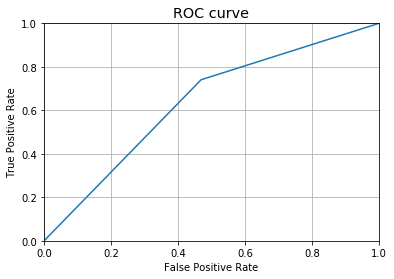

In [19]:
fpr, tpr, thresholds = roc_curve(df_y_val, predictions)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

## 6. Creation new dataframe

In [20]:
mod_df = pd.DataFrame(df_X_val)

In [21]:
mod_df.head()

,age,weight,height,HIPX,HRT,smoking,ReumatoidArthritis,SecondaryOsteoporsis,Alcohol,VitaminD,calcium,dose_walk,dose_moderate,dose_vigorous
101082,0.276786,-0.936935,-0.133159,-0.037838,2.362657,0.760768,-0.08895,-0.134216,0.702816,-0.841916,-0.558891,-0.459667,-0.387815,-0.168681
33245,-0.219831,-1.140955,-1.003510,-0.037838,-0.423252,2.330176,-0.08895,-0.134216,1.957998,1.573485,-0.426449,-0.459667,-0.313105,-0.538945
33058,-0.219831,-1.466111,-0.568335,-0.037838,-0.423252,-0.808640,-0.08895,-0.134216,0.235441,-0.323294,-0.195111,-0.637774,-0.163685,0.016451
79140,0.525095,-1.695633,-1.112304,-0.037838,-0.423252,-0.808640,-0.08895,-0.134216,-0.341796,-1.019626,-0.397402,0.208233,1.479936,-0.538945
99344,0.525095,-1.625501,-1.765067,-0.037838,-0.423252,0.760768,-0.08895,-0.134216,-0.788571,-0.638819,0.818365,0.074653,1.629356,-0.076115


In [22]:
mod_df['real_class'] = df_y_val
mod_df['predicted_class'] = predictions

In [23]:
mod_df.head()

,age,weight,height,HIPX,HRT,smoking,ReumatoidArthritis,SecondaryOsteoporsis,Alcohol,VitaminD,calcium,dose_walk,dose_moderate,dose_vigorous,real_class,predicted_class
101082,0.276786,-0.936935,-0.133159,-0.037838,2.362657,0.760768,-0.08895,-0.134216,0.702816,-0.841916,-0.558891,-0.459667,-0.387815,-0.168681,0,1
33245,-0.219831,-1.140955,-1.003510,-0.037838,-0.423252,2.330176,-0.08895,-0.134216,1.957998,1.573485,-0.426449,-0.459667,-0.313105,-0.538945,0,0
33058,-0.219831,-1.466111,-0.568335,-0.037838,-0.423252,-0.808640,-0.08895,-0.134216,0.235441,-0.323294,-0.195111,-0.637774,-0.163685,0.016451,0,0
79140,0.525095,-1.695633,-1.112304,-0.037838,-0.423252,-0.808640,-0.08895,-0.134216,-0.341796,-1.019626,-0.397402,0.208233,1.479936,-0.538945,0,0
99344,0.525095,-1.625501,-1.765067,-0.037838,-0.423252,0.760768,-0.08895,-0.134216,-0.788571,-0.638819,0.818365,0.074653,1.629356,-0.076115,0,0


In [24]:
mod_df_complete = mod_df[(mod_df['real_class'] == 0) & ( mod_df['predicted_class']==1)]

In [25]:
mod_df_complete['Class'] = mod_df['real_class']
mod_df_complete = mod_df_complete.drop(['real_class','predicted_class'],axis=1)
mod_df_complete.shape

/Users/erennio/anaconda2/envs/Python36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(4698, 15)

In [26]:
std_patients = pd.read_csv('../../../Data/standardized_patients.csv', index_col=0)
std_patients.drop(columns=['sex','menopause'], axis=1, inplace=True)
std_patients.shape

(153884, 15)

for index in mod_df_complete.index.values:
    feature_to_check = std_patients.loc[index].round(10) == mod_df_complete.loc[index].round(10)
    for check in feature_to_check:
        if not check:
            print(index, feature_to_check)

In [27]:
for index in mod_df_complete.index.values:
    equals = True
    patient = std_patients.loc[index].round(10) == mod_df_complete.loc[index].round(10)
    for feature in patient:
        if not feature:
            equals = False
            print(std_patients.loc[index].round(10) == giorgiONE.loc[index].round(10), index)
    if equals:
        std_patients.loc[index,'Class'] = 1        
    

In [28]:
std_patients.loc[mod_df_complete.index.values,'Class'].shape

(4698,)

In [29]:
std_patients.to_csv('../../../Data/women_menopause/new_std_patients.csv')

## 7. Save the model

In [30]:
joblib.dump(mlp, 'NeuralNetwork - Women_Menopause - First Run - Base Ratio 1.pkl') 

['NeuralNetwork - Women_Menopause - First Run - Base Ratio 1.pkl']